![Astrofisica Computacional](../logo.PNG)

---
## 01. Montecarlo Methods


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### About this notebook

In this notebbok we present the basics of Montecarlo methods.

---

Some astrophysical processes, such as radioactive decays, present a random behavior and therefore, it is fundamentally impossible to predict completely its evolution. Similarly, there are other processes such as Brownian motion that, altough not truly random, they can be treated and analyzed using similar tools.

In this notebook we will present some of the computational methods that may be used to study and model random processes.

---
## Probability Basics

If we are performing an experiment with possible outcomes $r_k$, the probability of obtaining the outcome $r_k$ is given by

\begin{equation}
P(r_k) = p_k
\end{equation}

where

* $0 \leq p_k \leq 1$

* If $r_k$ cannot be realized, then $p_k = 0$ and if $r_k$ is the only possible outcome, then $p_k = 1$.

* If two outcomes $r_i$ and $r_j$ are mutually exclusive, then
\begin{equation}
P(r_i \text{ AND } r_j) = 0
\end{equation}
and
\begin{equation}
P(r_i \text{ OR } r_j) = p_i + p_j.
\end{equation}

* If there are $N$ mutually exclusive outcomes $E_k$ with $k=1,2,...,N$ and these events are all possible outcomes of the experiment, then
\begin{equation}
\sum_{i=1}^N P(r_i) = 1.
\end{equation}

* In a two-stage experiment in which outcomes $s_i$ and $t_j$ occur after each other and are independent of eath other, $r_{ij}$ is called the *combined outcome* and
\begin{equation}
P(r_{ij}) = P(s_i) P(t_j).
\end{equation}




---
## Random Numbers Generator (RNG)

The first tool we need is a **R**andom **N**umbers **G**enerator (RNG). Technically speaking, computers use *pseudo-random* numbers, which look random but are generated by a deterministic formula (usually called the RNG).

In `Python`, some of the functions that we found to generate [random numbers](https://docs.python.org/3/library/random.html) are

- `random.random()` : Random floating-point number uniformly distributed in the range [0,1).

- `random.randrange(n)` : Random integer in the range [0, n-1)

- `random.randrange(m,n)` : Random integer in the range [m, n-1)

- `random.randrange(m,n,k)` : Random integer in the range [m, n-1) in steps of k

In [1]:
import random as rnd

rnd.random()

0.6528042611437308

In [4]:
rnd.randrange(10) , rnd.randrange(10)

(4, 6)

In [5]:
rnd.randrange(10,20)

17

In [6]:
rnd.randrange(10,50,2)

20

The [NumPy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) library also has some functions to generate random numbers:

- `numpy.random.randint(n, size=(a,b))`: random array of shape (a,b) with integers in the range [0,n) 

- `numpy.random.randint(m,n, size=(a,b))`: random array of shape (a,b) with integers in the range [m,n) 

- `numpy.random.rand(a,b)`: random array of shape (a,b) with float in the range [0,1)

In [15]:
from numpy import random

random.randint(10)

6

In [18]:
random.randint(10, size=(5))

array([8, 4, 3, 8, 3])

In [21]:
random.randint(10, size=(5,3))

array([[4, 7, 2],
       [1, 3, 6],
       [1, 2, 9],
       [2, 1, 3],
       [4, 1, 9]])

In [16]:
random.randint(10,20)

18

In [22]:
random.randint(10,20, size=(5,3))

array([[13, 17, 15],
       [16, 16, 12],
       [12, 14, 19],
       [13, 15, 12],
       [17, 16, 12]])

In [17]:
random.rand()

0.718913163463421

In [24]:
random.rand(5,3)

array([[0.1013622 , 0.70869536, 0.46889646],
       [0.71491927, 0.23463086, 0.74220726],
       [0.21126721, 0.54220293, 0.13543678],
       [0.23191562, 0.19739695, 0.66795796],
       [0.87600472, 0.07104298, 0.22788474]])

---
### Random Number Seeds

Random numbers are generated computationally by an algorithm which begins a sequence with an input value known as *seed*. In fact, the seed specifies where the sequence starts and also the entire numbers in the sequence.

In order to obtain reproducible results, even when using random numbers, it is possible to define the seed to start the RNG.

In [33]:
random.seed(413)
print(random.rand(5))

[0.65678455 0.3850419  0.07794658 0.58589957 0.48574423]


## Intensity of a Light beam

As a first example of the application of random numbers to model an astrophysical system, consider a ligth beam (with only one frequency) moving through an interstellar cloud of gas. 

In general, when light passes through matter, energy may be added or substracted from it by emission, absorption or scattering processes. Therefore, the intensity of the light beam will not remain constant. As a first model, we will consider only absorption of energy by particles in the cloud, modeled by an *absorption coeffcient*, $\alpha$ $[\text{cm}^{-1}]$. The intensity of the light beam, $I(s)$, depending on the distance $s$ that it travels, will satisfy the differential equation

\begin{equation}
\frac{dI}{ds} = -\alpha I.
\end{equation}

Integration of this expression gives an exponentially decay,

\begin{equation}
I(s) = I_0 e^{- \int_{s_0} ^s \alpha(s') ds'}
\end{equation}

where $I_0 = I(s=s_0) $ is the initial intensity. 

It is usual to define the *optical depth*, $\tau$, as
\begin{equation}
d\tau = \alpha ds
\end{equation}

or 

\begin{equation}
\tau (s) = \int_{s_0} ^s \alpha(s') ds'. 
\end{equation}

This gives an intensity function of the form

\begin{equation}
I(s) = I_0 e^{- \tau}.
\end{equation}

Fro here, a medium is said to be *optically thick* or *opaque* if $\tau >1$ and it is said to be *optically thin* or *transparent* if $\tau <1$. 

If absorption coefficient is constant, we have

\begin{equation}
\tau (s) = \alpha (s-s_0) 
\end{equation}

or 

\begin{equation}
I(s) = I_0 e^{- \alpha (s-s_0)}.
\end{equation}

It is also possible to define the *mean free path* of radiation (or photons) as the average distance that a photon can travel through an absobing material without being absorbed. It is given by 

\begin{equation}
\ell = \frac{1}{\alpha}
\end{equation}

so that the intensity function will be

\begin{equation}
I(s) = I_0 e^{-\frac{(s-s_0)}{\ell}}.
\end{equation}

#### Intensity and Number of photons

Intensity is the total amount of energy falling on (or going through) a surface per unit area $A$ per unit time $t$ and therefore, it measured in $\frac{\text{J}}{\text{m}^2\text{s}}$.

For monochromatic radiation, the total energy emitted equals the number of photons, $n$ times the energy of one photon, $h \nu$.

Hence, the intensity is given by

\begin{equation}
I = \frac{hn\nu}{At}.
\end{equation}

For constant area and time, we can write the intensity at position $s$ as proportional to the number of photons at that location,

\begin{equation}
I(s) \propto n(s) \nu.
\end{equation}

Hence, we can re-write the intensity equation as

\begin{equation}
n(s) = n_0 e^{- \frac{(s-s_0)}{\ell}}.
\end{equation}

where $n_0$ represents the number of photons at $s=0$, i.e. the number of photons in the incident beam.  

 #### Modelling the Intensity using Random Numbers
 
We will model the behavior of gamma rays moving through a region in the Solar System neighborhood. Following the work of Vernetto and Lipari, [arXiV:1608.01587](https://arxiv.org/pdf/1608.01587.pdf), we will consider an estimate for the absorption coeffcient of the order of $\alpha \sim 0.1 \text{ kpc}^{-1} \sim 0.3 \times 10^{-22} \text{ cm}^{-1}$ or equivalently, the mean free path of these photons will be $\ell \sim 10 \text{kpc} \sim 3 \times 10^{22} \text{cm}$. 

We will start the model using, at $s_0=0$, a number of $n_0 = 1000000$ photons and will simulate the absorption of these photons over distance $s$ using random numbers. Due to equation for $n(s)$ above, we know that the fraction of photons remaining at distance $s$ will be

\begin{equation}
\frac{n(s)}{n_0} = e^{- \frac{s}{\ell}}.
\end{equation}

This implies that the fraction that have been absorbed, which is equal to the probability $p(s)$ that any particular photon has been absorbed, is

\begin{equation}
p(s) = 1 - e^{- \frac{s}{\ell}}.
\end{equation}
 
Hence, this function represents the probability that a single photon is absorbed in a distance interval of size $s$. 

We begin the simulation with the set of $n_0 = 1000000$ photons at $s=0$ and consider a spatial step-size of $0.01 \text{kpc}$. In each of these steps we consider the probability $p(s)$ to decide if each of the photons remaining will be absorbed or not. 

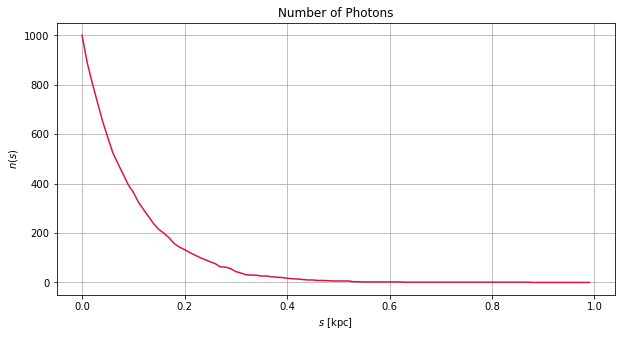

In [74]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt

n0 = 1000
l = 0.1 #[kpc]
ds = 0.01 #[kpc]

p = 1 - np.exp(-ds/l)

smax = 1.

spoints = np.arange(0.,smax, ds)
n = []

for s in spoints:
    n.append(n0)
    absorption = 0
    for i in range(n0):
        if random.rand() < p:
            absorption +=1
    n0 -= absorption

    

plt.figure(figsize=(10,5))
plt.plot(spoints, n, color='crimson')
plt.title('Number of Photons')
plt.xlabel(r'$s$ [kpc]')
plt.ylabel(r'$n(s)$')
plt.grid()
plt.show()

---

## Non-Uniform Random Numbers

The functions described above generate uniformly distibuted random numbers, i.e. all the values provided occur with equal probability. However, we may be interested in a process tha happens with non-uniform probability. A clear example is the absorption of radiation treated above in which the probability of an absorption of a particular photon is given by $p(s) = 1 - e^{- \frac{(s)}{\ell}}$ and hence, the probability of absorption in a small spatial interval with size $ds$ is given by 

\begin{equation}
p(ds) = 1 - e^{- \frac{ds}{\ell}} = \frac{ds}{\ell} + \mathcal{O} \left( ds^2 \right).
\end{equation}

Now, we consider the probability that a particular photon is abosrbed between $s$ and $s+ ds$. Here we need that the particular photon must survive, witout being absorbed until it reaches $s$ (which happens with probability $e^{- \frac{s}{\ell}}$), and then the absorptionin the following interval of size $ds$ is given by $p(ds)$ above. Then, the total probability $P(s)ds$ of absorption   between $s$ and $s+ds$ will be

\begin{equation}
P(s)ds = e^{- \frac{s}{\ell}}\frac{ds}{\ell} + \mathcal{O} \left( ds^2 \right).
\end{equation}

This is an example of a *non-uniform probability distribution* because the exponential factor implies that, although photon may be absorbed anywhere, earlier absorptions (near $s=0$) are more probable than late ones (i.e. for $s \rightarrow \infty$).
The non-uniform probability distribution may be used to simulate the behavior of the photons more efficiently. However, we need to know how to generate non-uniform random numbers (drawn from the exponential distribution above).

### Transforming a Uniform RNG into a Non-Uniform One

Suppose you have a source of random numbers $z$ drawn from a distribution with probability density $q(z)$, meaning that the probability of generating a number in the interval $z$ to $z+dz$ is $q(z)dz$. Now suppose that you have a function $x = x(z)$. Since $z$ is a random number, $x(z)$ is also random number but it will have some other distribution $p(x)$ different from $q(z)$. The trick we want to learn is how to chose $x(z)$ to obtain the probability distribution $p(x)$ that we want.

The probability of generating a value between $x$ and $x+dx$ is, by definition, equal to the probability of generating a value of $z$ in the corresponding interval, i.e.

\begin{equation}
p(x) dx = q(z) dz,
\end{equation}

where $x = x(z)$. When we have a uniform distribution of random numbers between $0$ and $1$, the probability density will be 

\begin{equation}
q(z) = \begin{cases}
1 \text{ for } 0\leq z < 1 \\
0 \text{ elsewhere.}
\end{cases}
\end{equation}

Using this function and integrating we obtain,

\begin{equation}
\int_0^{x(z)} p(x') dx' = \int_0 ^z q(z') dz' = \int_0 ^z  dz' = z,
\end{equation}

for $0\leq z < 1$. In case we can integrate the left hand side using the probability distribution that we want, we will be able to find the function $x(z)$. For example, using an exponential probability distribution,

\begin{equation}
p(x) = \kappa e^{-\kappa x},
\end{equation}

we can integrate to obtain

\begin{equation}
\kappa \int _0 ^{x(z)} e^{-\kappa x'} dx' = 1 - e^{-\kappa x} = z.
\end{equation}

Solving for $x$ gives

\begin{equation}
x(z) = -\frac{ \log (1 - z)}{\kappa}.
\end{equation}

Hence, all we need to do is to generate uniform random numbers $z$ in the interval $[0,1)$ , feed them into this equation and get the exponentially distributed values $x$.


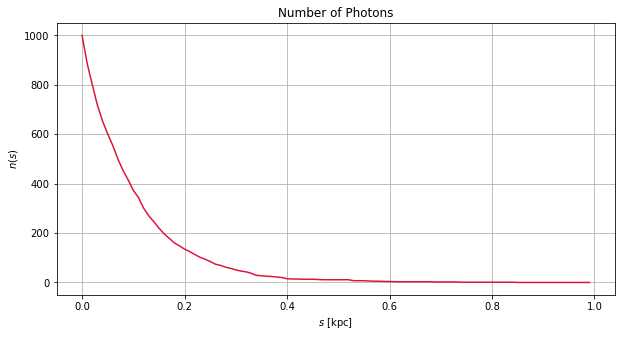

In [75]:
from numpy import random
import numpy as np
import matplotlib.pyplot as plt

n0 = 1000
l = 0.1 #[kpc]
ds = 0.01 #[kpc]
smax = 1.

z = random.rand(n0)
x = - l*np.log(1-z)

spoints = np.arange(0.,smax, ds)

n = []
for s in spoints:
    n.append(n0- np.count_nonzero(x<s)) # Number of remaining photons

plt.figure(figsize=(10,5))
plt.plot(spoints, n, color='crimson')
plt.title('Number of Photons')
plt.xlabel(r'$s$ [kpc]')
plt.ylabel(r'$n(s)$')
plt.grid()
plt.show()


---
## Monte Carlo Integration

